In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import cross_validate, learning_curve, train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Dropping rows with NaN in "Total Square Feet" for 1-bedroom properties 
jamaicadf = pd.read_excel("rentalsJamaica.xlsx")

In [3]:
jamaicadf["Price"].describe()

count      4737.000000
mean       2634.825256
std       15249.337643
min         450.000000
25%        1800.000000
50%        2300.000000
75%        2775.000000
max      950000.000000
Name: Price, dtype: float64

In [4]:
# Analysis of One Bedroom Properties in Jamaica
jamaicaOneBrnonan = jamaicadf[jamaicadf["Beds"] == 1].dropna(subset=["Total Square Feet"])
jamaicaOneBrnonan["Price"].describe()

count     384.000000
mean     2154.789062
std       412.077789
min       750.000000
25%      1901.500000
50%      2165.000000
75%      2427.750000
max      3406.000000
Name: Price, dtype: float64

In [5]:
jamaicaTwoBrnonan = jamaicadf[jamaicadf["Beds"] == 2].dropna(subset=["Total Square Feet"])
jamaicaTwoBrnonan["Price"].describe()

count     353.000000
mean     2649.878187
std       579.436476
min      1200.000000
25%      2300.000000
50%      2700.000000
75%      3050.000000
max      3958.000000
Name: Price, dtype: float64

In [6]:
jamaicaThreeBrnonan = jamaicadf[jamaicadf["Beds"] == 3].dropna(subset=["Total Square Feet"])
jamaicaThreeBrnonan["Price"].describe()

count       293.000000
mean       4135.481229
std       26144.932783
min        1300.000000
25%        2150.000000
50%        2500.000000
75%        3000.000000
max      449999.000000
Name: Price, dtype: float64

In [7]:
jamaicaFourBrnonan = jamaicadf[jamaicadf["Beds"] == 4].dropna(subset=["Total Square Feet"])
jamaicaFourBrnonan["Price"].describe()

count      51.000000
mean     2998.431373
std       699.572362
min      1900.000000
25%      2500.000000
50%      2900.000000
75%      3300.000000
max      5300.000000
Name: Price, dtype: float64

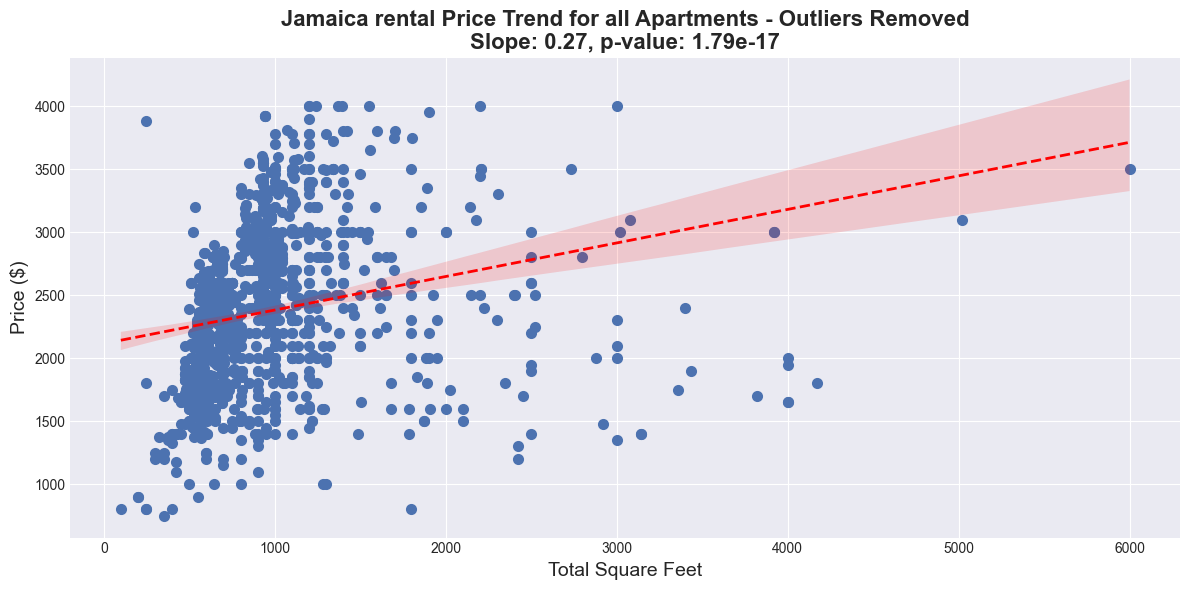

In [8]:
# Trend Analysis for all apartments in Jamaica
from scipy.stats import linregress

jamaicadf = jamaicadf.dropna(subset=["Total Square Feet", "Price"])

# Filter for Total Square Feet < 1500
filteredx = jamaicadf["Total Square Feet"]
filteredy = jamaicadf["Price"]

# Remove price outliers using IQR method
Q1 = filteredy.quantile(0.25)
Q3 = filteredy.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filteredx_no_outlier = filteredx[(filteredy >= lower_bound) & (filteredy <= upper_bound)]
filteredy_no_outlier = filteredy[(filteredy >= lower_bound) & (filteredy <= upper_bound)]

# Calculate regression statistics
slope, intercept, r_value, p_value, std_err = linregress(filteredx_no_outlier, filteredy_no_outlier)

# Plot as before
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(filteredx_no_outlier, filteredy_no_outlier, label='Jamaica', color='#4C72B0', linewidth=2)
sns.regplot(x=filteredx_no_outlier, y=filteredy_no_outlier, scatter=False, ax=ax, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})

# Add coefficient and p-value to the title or as text
ax.set_title(f"Jamaica rental Price Trend for all Apartments - Outliers Removed\n"
             f"Slope: {slope:.2f}, p-value: {p_value:.3g}", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)

plt.tight_layout()
plt.show()

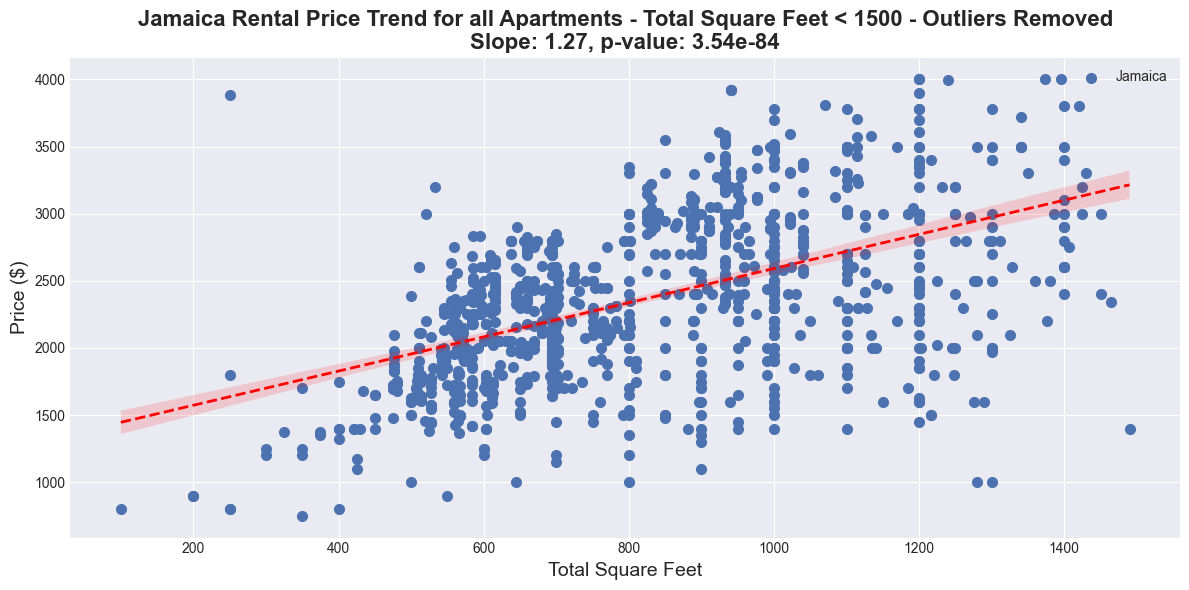

In [9]:
# Trend Analysis for all apartments in Jamaica - Filtered by Total Square Feet < 1500
from scipy.stats import linregress

jamaicadf = jamaicadf.dropna(subset=["Total Square Feet", "Price"])

# Filter for Total Square Feet < 1500
filteredx = jamaicadf["Total Square Feet"][jamaicadf["Total Square Feet"] < 1500]
filteredy = jamaicadf["Price"][jamaicadf["Total Square Feet"] < 1500]

# Remove price outliers using IQR method
Q1 = filteredy.quantile(0.25)
Q3 = filteredy.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filteredx_no_outlier = filteredx[(filteredy >= lower_bound) & (filteredy <= upper_bound)]
filteredy_no_outlier = filteredy[(filteredy >= lower_bound) & (filteredy <= upper_bound)]


# Calculate regression statistics
slope, intercept, r_value, p_value, std_err = linregress(filteredx_no_outlier, filteredy_no_outlier)

# Plot as before
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(filteredx_no_outlier, filteredy_no_outlier, label='Jamaica', color='#4C72B0', linewidth=2)
sns.regplot(x=filteredx_no_outlier, y=filteredy_no_outlier, scatter=False, ax=ax, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})

# Add coefficient and p-value to the title or as text
ax.set_title(f"Jamaica Rental Price Trend for all Apartments - Total Square Feet < 1500 - Outliers Removed\n"
             f"Slope: {slope:.2f}, p-value: {p_value:.3g}", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()

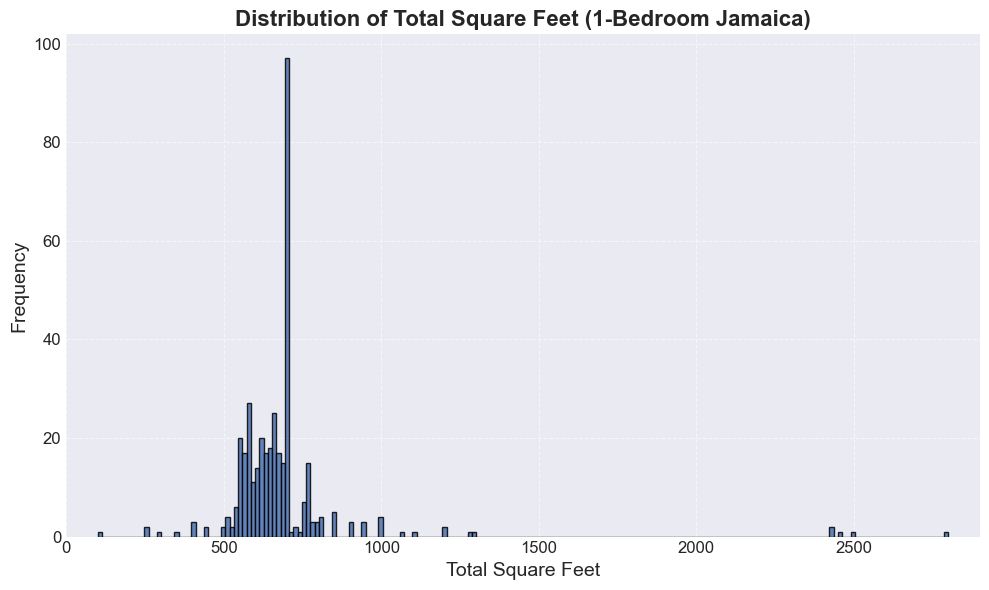

In [10]:
# The Distribution of Total Square Feet for 1-Bedroom Properties in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaOneBrnonan["Total Square Feet"], bins=200, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, jamaicaOneBrnonan["Total Square Feet"].max() + 100)
ax.set_title("Distribution of Total Square Feet (1-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

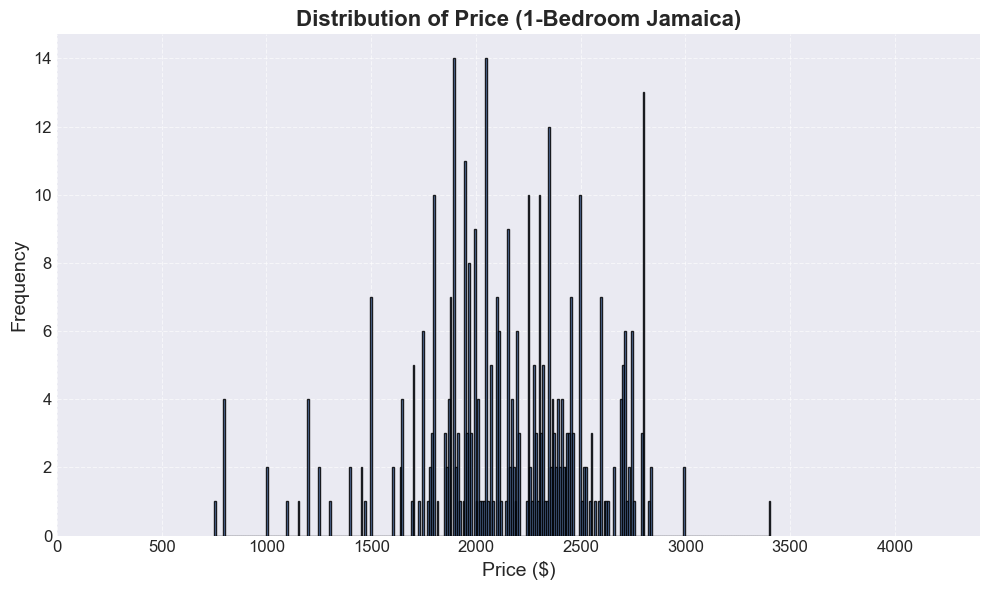

In [50]:
# The Distribution of Price for 1-Bedroom Properties in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaOneBrnonan["Price"], bins=300, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, jamaicaOneBrnonan["Price"].max() + 1000)
ax.set_title("Distribution of Price (1-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Price ($)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

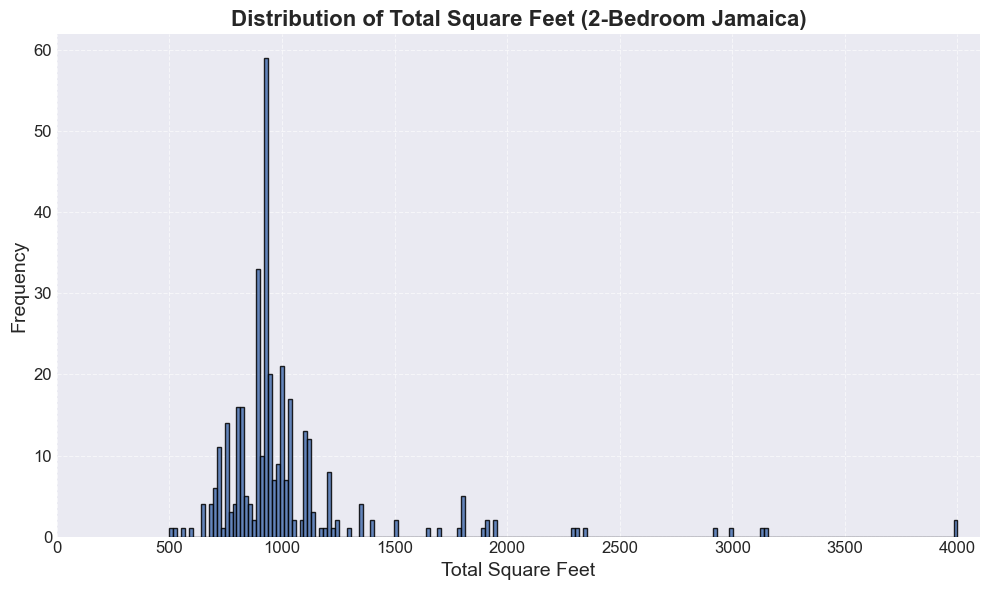

In [51]:
# The Distribution of Total Square Feet for 2-Bedroom Properties in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaTwoBrnonan["Total Square Feet"], bins=200, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, jamaicaTwoBrnonan["Total Square Feet"].max() + 100)
ax.set_title("Distribution of Total Square Feet (2-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

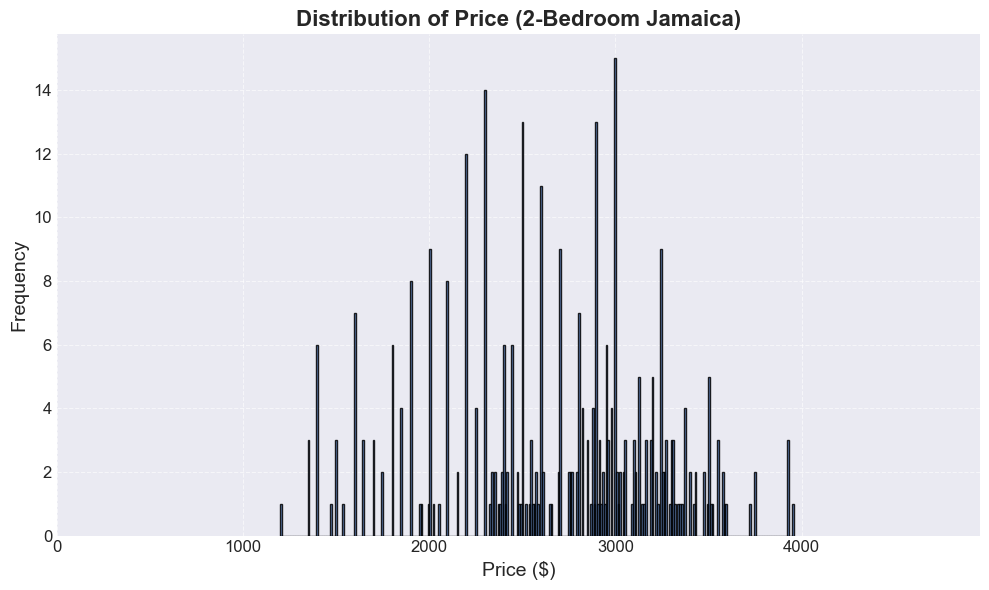

In [52]:
# Distribution of Price for 2-Bedroom Properties in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaTwoBrnonan["Price"], bins=300, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, jamaicaTwoBrnonan["Price"].max() + 1000)
ax.set_title("Distribution of Price (2-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Price ($)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

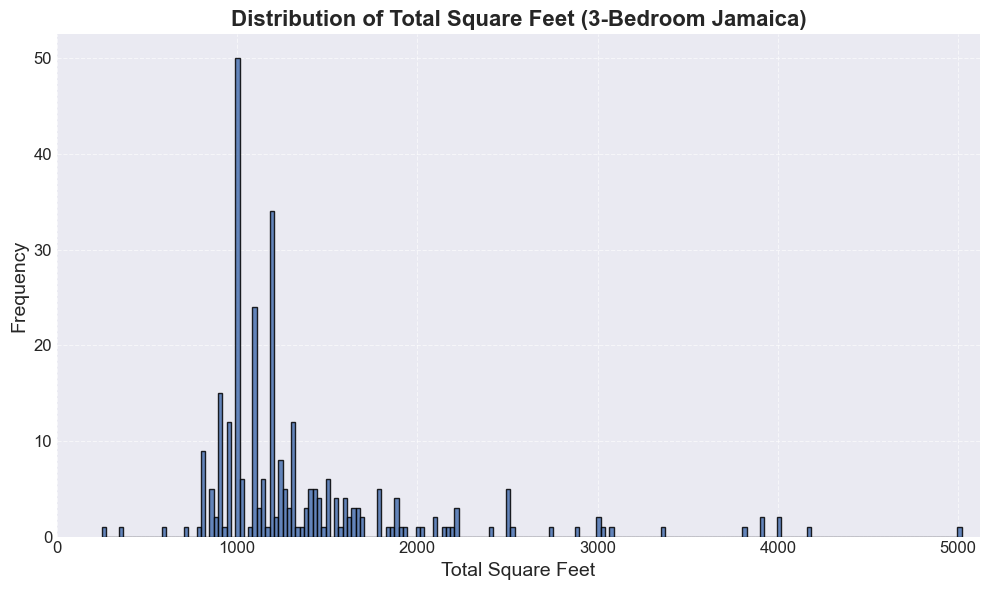

In [53]:
# Distribution of Total Square Feet for 3-Bedroom Properties in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaThreeBrnonan["Total Square Feet"], bins=200, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, jamaicaThreeBrnonan["Total Square Feet"].max() + 100)
ax.set_title("Distribution of Total Square Feet (3-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

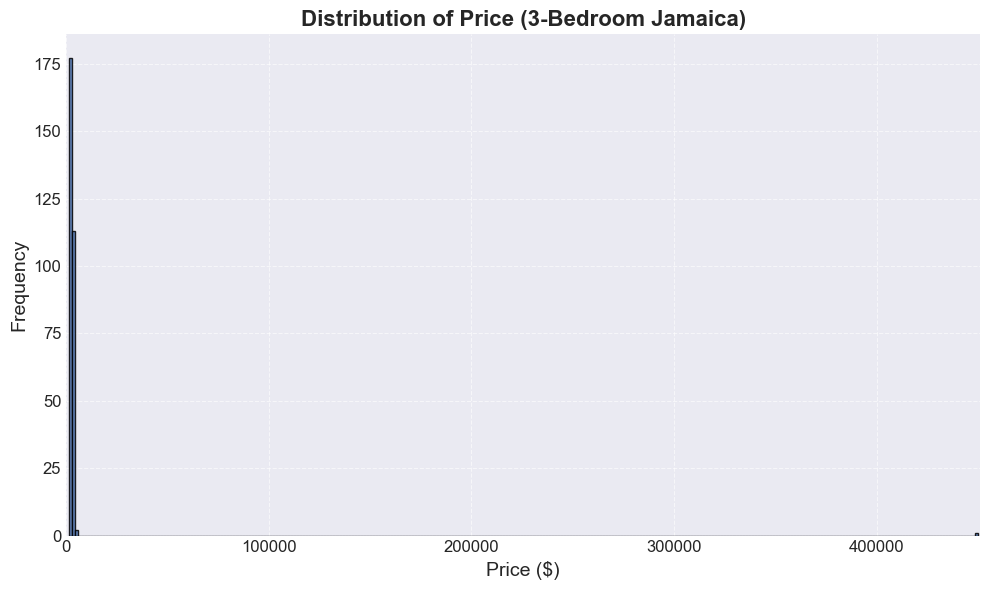

In [54]:
# The Distribution of Price for 3-Bedroom Properties in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaThreeBrnonan["Price"], bins=300, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, jamaicaThreeBrnonan["Price"].max() + 1000)
ax.set_title("Distribution of Price (3-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Price ($)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

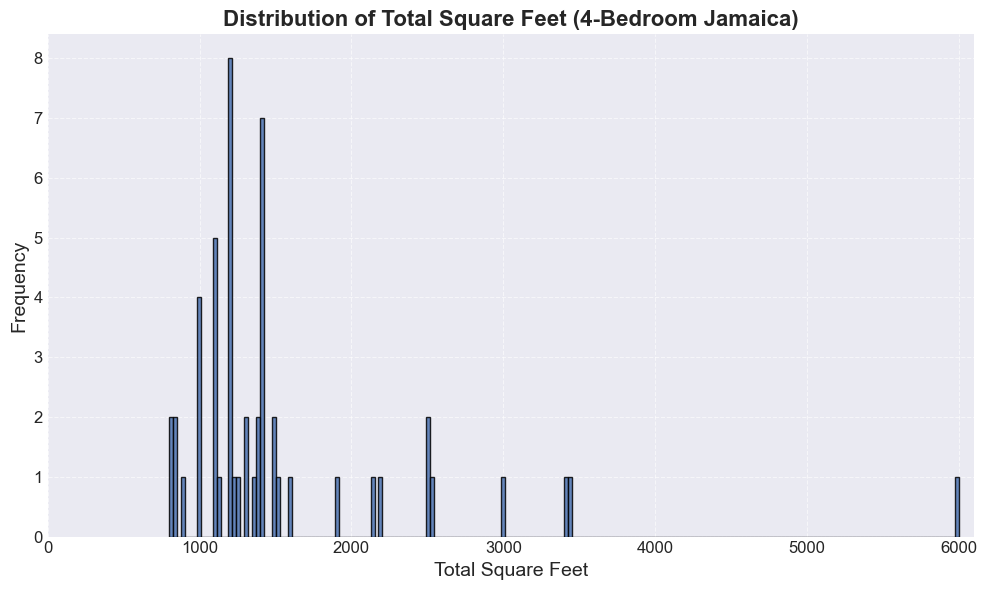

In [55]:
# The Distribution of Total Square Feet for 4-Bedroom Properties in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaFourBrnonan["Total Square Feet"], bins=200, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, jamaicaFourBrnonan["Total Square Feet"].max() + 100)
ax.set_title("Distribution of Total Square Feet (4-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

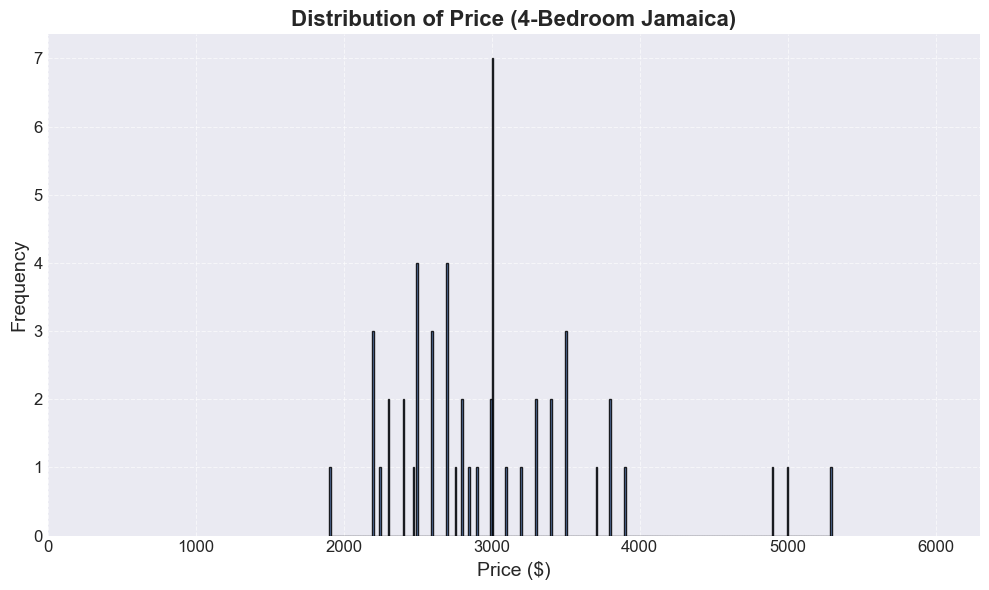

In [56]:
# The Distribution of Price for 4-Bedroom in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(jamaicaFourBrnonan["Price"], bins=300, color='#4C72B0', edgecolor='black', alpha=0.85)
ax.set_xlim(0, jamaicaFourBrnonan["Price"].max() + 1000)
ax.set_title("Distribution of Price (4-Bedroom Jamaica)", fontsize=16, fontweight='bold')
ax.set_xlabel("Price ($)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [57]:
nycdf = pd.read_excel("rentalsNYC.xlsx")

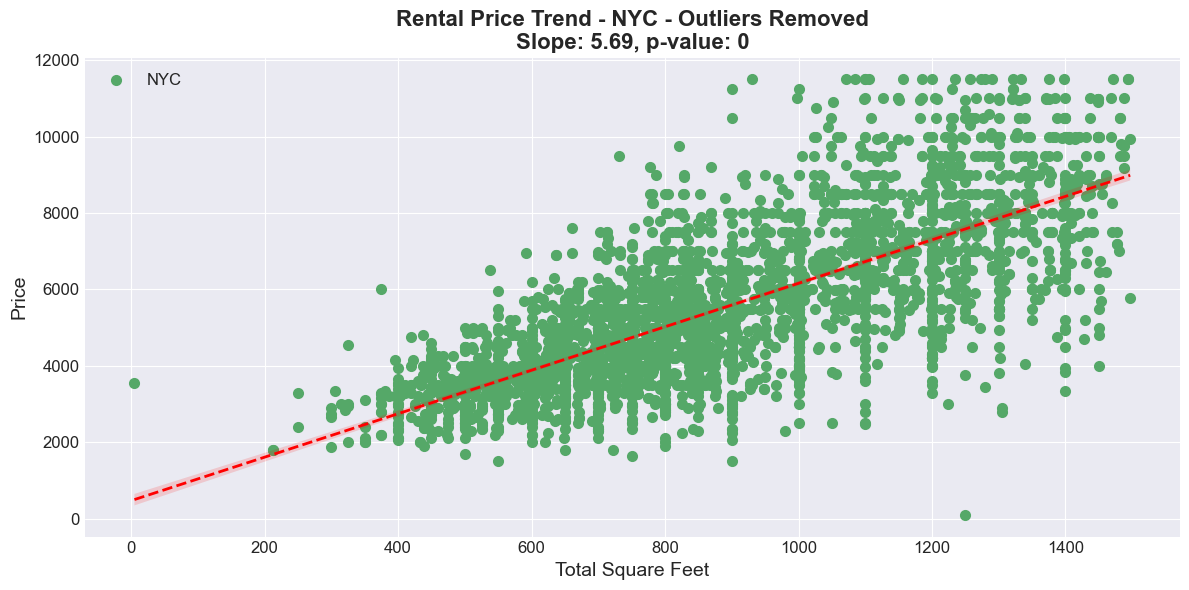

Mean Squared Error (5-Fold CV): 73157550.09


In [58]:
# Trend Analysis for all apartments in NYC
from scipy.stats import linregress
nycdf = nycdf.dropna(subset=["Total Square Feet", "Price"])
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
filteredx = nycdf["Total Square Feet"][nycdf["Total Square Feet"] < 1500]
filteredy = nycdf["Price"][nycdf["Total Square Feet"] < 1500]
# Remove price outliers using IQR method
Q1 = filteredy.quantile(0.25)
Q3 = filteredy.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filteredx_no_outlier = filteredx[(filteredy >= lower_bound) & (filteredy <= upper_bound)]
filteredy_no_outlier = filteredy[(filteredy >= lower_bound) & (filteredy <= upper_bound)]
ax.scatter(filteredx_no_outlier, filteredy_no_outlier, label='NYC', color='#55A868', linewidth=2)
# Calculate regression statistics for NYC
slope, intercept, r_value, p_value, std_err = linregress(filteredx_no_outlier, filteredy_no_outlier)
ax.set_title(f"Rental Price Trend - NYC - Outliers Removed\nSlope: {slope:.2f}, p-value: {p_value:.3g}", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
# Add Trendline
sns.regplot(x=filteredx_no_outlier, y=filteredy_no_outlier,scatter=False, ax=ax, color='red', line_kws={'linewidth': 2, 'linestyle': '--'})
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()
# Linear Regression Model for NYC all apartments
X = nycdf[["Total Square Feet"]]
y = nycdf["Price"]
model = LinearRegression()
model.fit(X, y)
# Model Evaluation
cv_results = cross_validate(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -np.mean(cv_results['test_score'])
print(f"Mean Squared Error (5-Fold CV): {mean_mse:.2f}")

In [82]:
# Preprocessing Examine Missing Values
nycdfOneB = nycdf[nycdf["Beds"] == 1]
nycdfOneB["Total Square Feet"].describe()
nycdfOneB["Price"].describe()

count     1789.000000
mean      5220.825601
std       2079.782428
min        500.000000
25%       3800.000000
50%       4800.000000
75%       6000.000000
max      25000.000000
Name: Price, dtype: float64

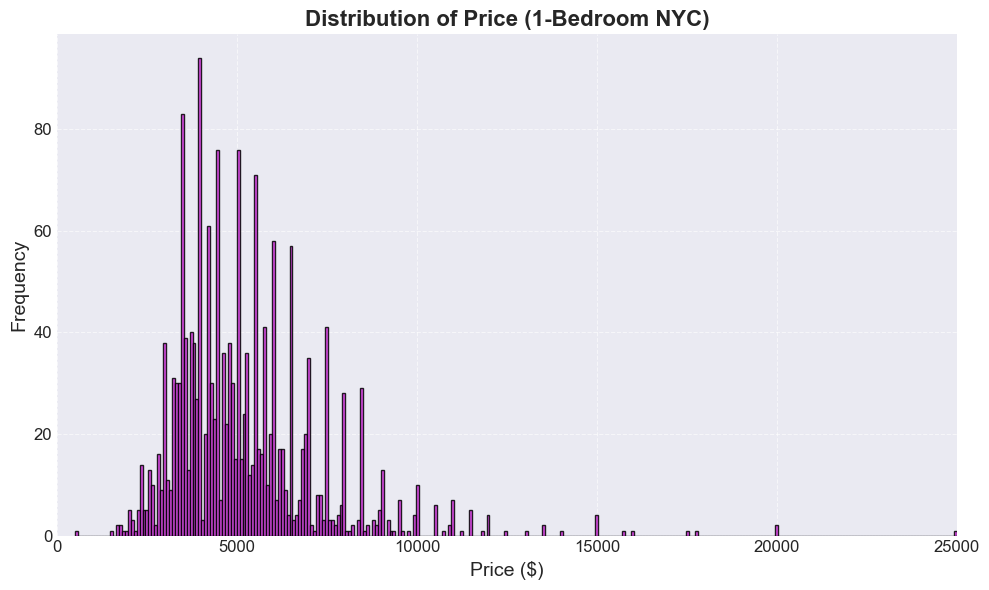

In [83]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(nycdfOneB["Price"], bins=300, color="#D633E2", edgecolor='black', alpha=0.85)
ax.set_xlim(0, 25000)
ax.set_title("Distribution of Price (1-Bedroom NYC)", fontsize=16, fontweight='bold')
ax.set_xlabel("Price ($)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

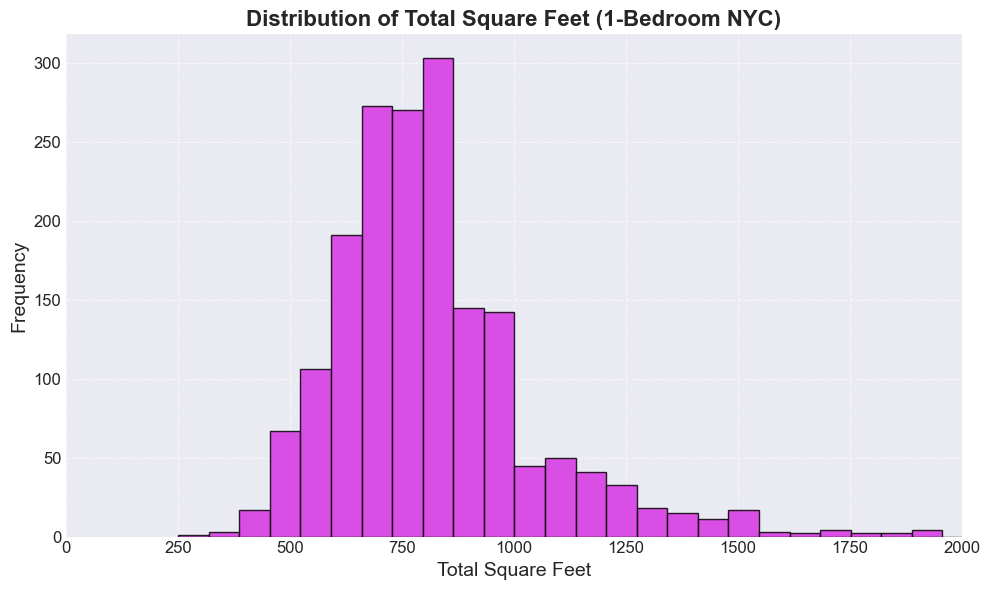

In [84]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(nycdfOneB["Total Square Feet"], bins=300, color="#D633E2", edgecolor='black', alpha=0.85)
ax.set_xlim(0, 2000)
ax.set_title("Distribution of Total Square Feet (1-Bedroom NYC)", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

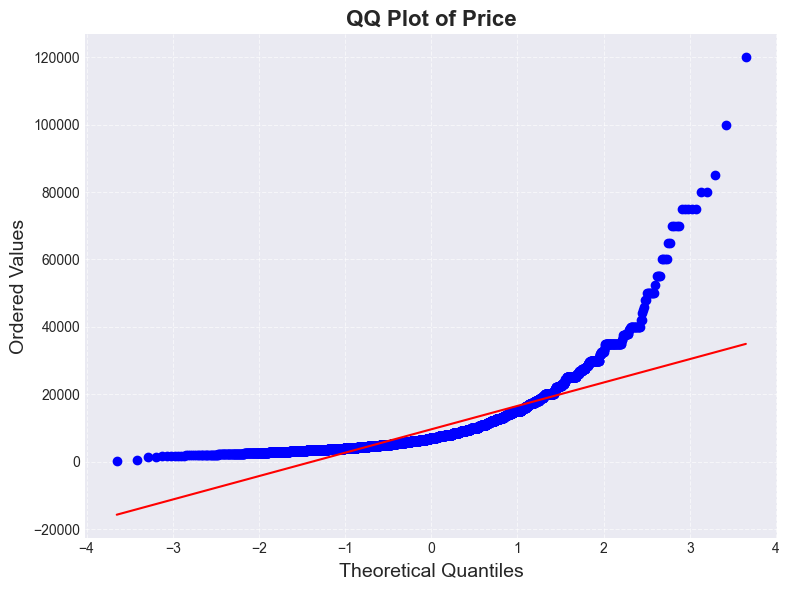

1789

In [85]:
from scipy import stats
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
stats.probplot(nycdf["Price"].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of Price", fontsize=16, fontweight='bold')
plt.xlabel("Theoretical Quantiles", fontsize=14)
plt.ylabel("Ordered Values", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

len(nycdfOneB["Price"].dropna())

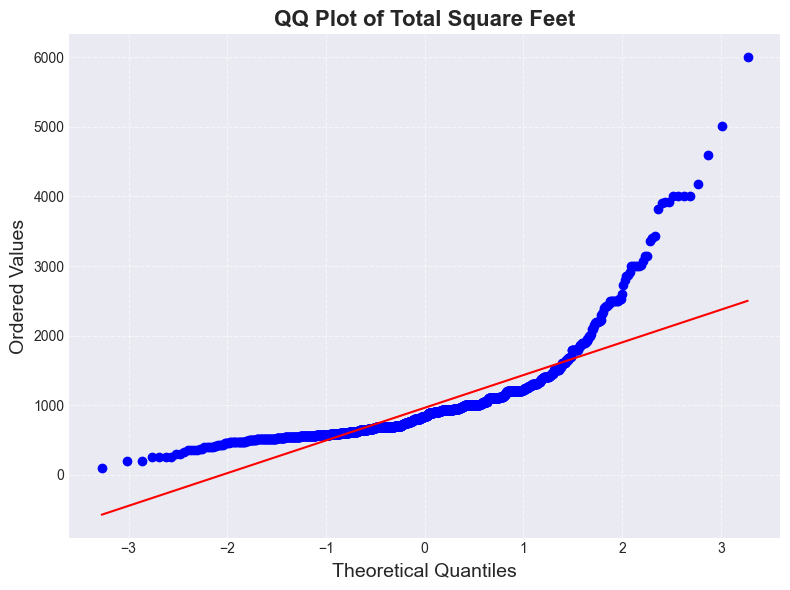

1301


In [86]:
# QQ Plot of Total Square Feet for Jamaica
plt.figure(figsize=(8, 6))
stats.probplot(jamaicadf["Total Square Feet"].dropna(), dist="norm", plot=plt)
plt.title("QQ Plot of Total Square Feet", fontsize=16, fontweight='bold')
plt.xlabel("Theoretical Quantiles", fontsize=14)
plt.ylabel("Ordered Values", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print(len(jamaicadf["Total Square Feet"].dropna()))

In [115]:
from scipy import stats

# Hypothesis Testing 
# We can either use parametric test or non-parametric test. There are a few assumptions for parametric tests: 1. Normality, 2. Homogeneity of variance 3. The mean is meaningful
# Here, we will use t-test and u-test to compare the means and distributions of two groups: 1-bedroom apartments in Jamaica and NYC.

# Use t-test to compare means of two groups
a = jamaicadf["Price"].dropna()
b = nycdf["Price"].dropna()
print(a.shape, b.shape)
t_stat, p_value = stats.ttest_ind(a, b, equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: means are significantly different.")
else:
    print("Fail to reject the null hypothesis: means are not significantly different.")
# This indicates that the average square footage of 1-bedroom apartments is significantly different from that of

# Log transform # the Price columns to reduce skewness
a_log = np.log1p(jamaicadf["Price"].dropna())
b_log = np.log1p(nycdf["Price"].dropna())

t_stat, p_value = stats.ttest_ind(a_log, b_log, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: means are significantly different.")
else:
    print("Fail to reject the null hypothesis: means are not significantly different.")

# boxcox transformation
from scipy.stats import boxcox
a_boxcox, _ = boxcox(a + 1)  # Adding 1
b_boxcox, _ = boxcox(b + 1)  # Adding 1
# T-test
t_stat, p_value = stats.ttest_ind(a_boxcox, b_boxcox, equal_var=False)
print(f"Box-Cox T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: means are significantly different.")
else:
    print("Fail to reject the null hypothesis: means are not significantly different.")
# This indicates that the average square footage of 1-bedroom apartments is significantly different from that of

# Use u-test to compare distributions
u_stat, p_value = stats.mannwhitneyu(a, b, alternative='two-sided')
print(f"U-statistic: {u_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: distributions are not significantly different.")

# ks-test to compare distributions
ks_stat, p_value = stats.ks_2samp(a, b)
print(f"KS-statistic: {ks_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: distributions are significantly different.")
else:
    print("Fail to reject the null hypothesis: distributions are not significantly different.")
# This indicates that the distribution of square footage of 1-bedroom apartments is significantly different from that
# of NYC.   

(4737,) (5279,)
T-statistic: -27.89, P-value: 0.0000
Reject the null hypothesis: means are significantly different.
T-statistic: -117.27, P-value: 0.0000
Reject the null hypothesis: means are significantly different.
Box-Cox T-statistic: -189.44, P-value: 0.0000
Reject the null hypothesis: means are significantly different.
U-statistic: 694720.00, P-value: 0.0000
Reject the null hypothesis: distributions are significantly different.
KS-statistic: 0.84, P-value: 0.0000
Reject the null hypothesis: distributions are significantly different.


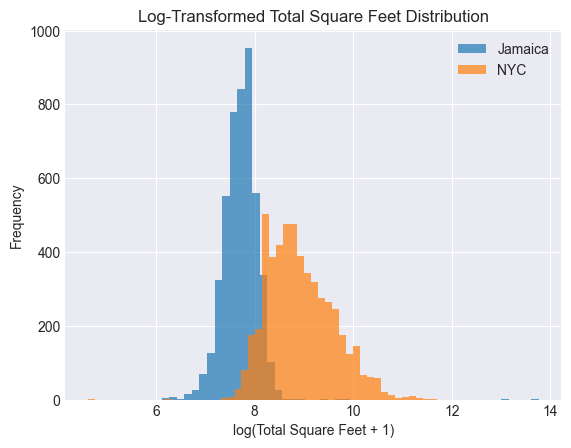

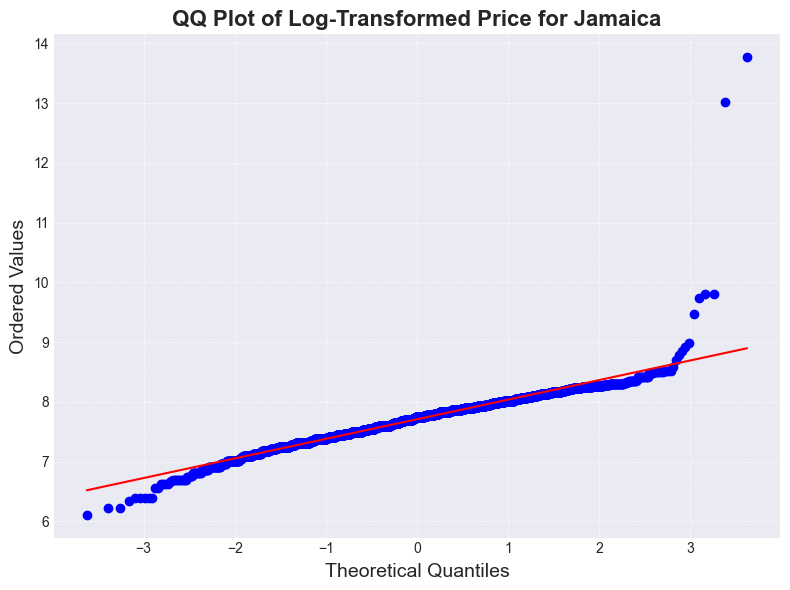

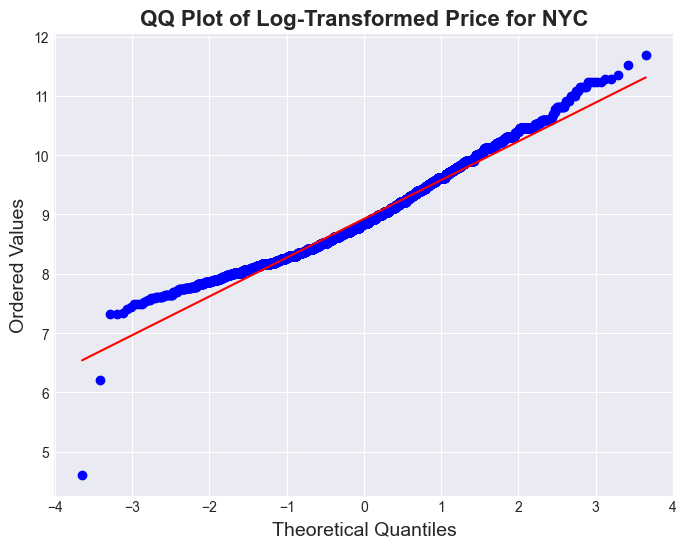

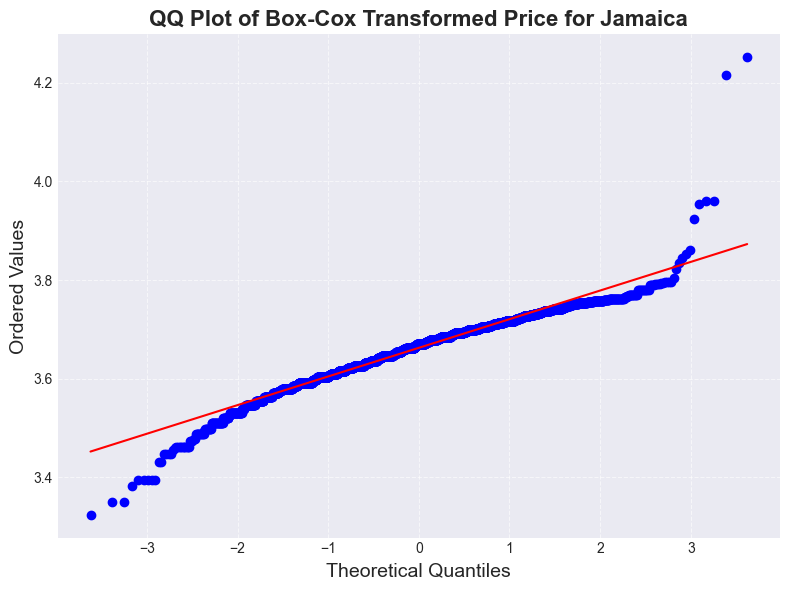

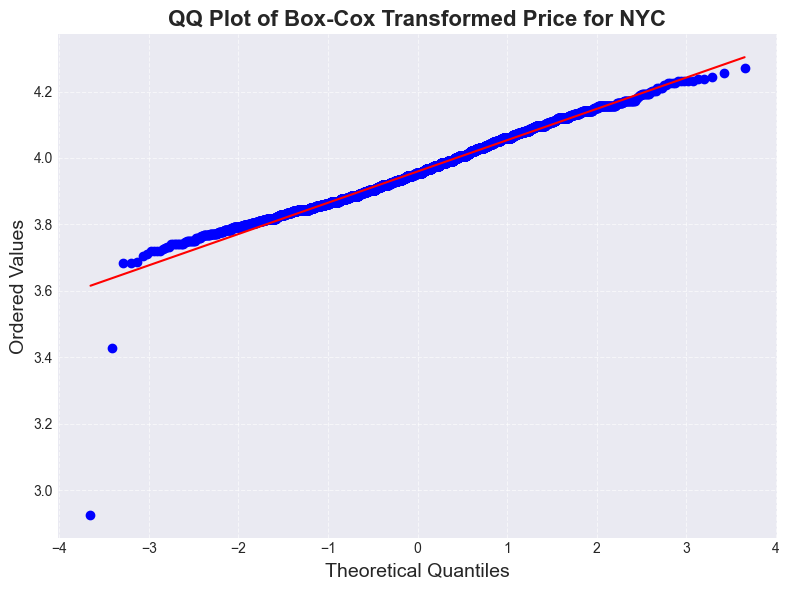

In [116]:
plt.hist(a_log, bins=50, alpha=0.7, label='Jamaica')
plt.hist(b_log, bins=50, alpha=0.7, label='NYC')
plt.legend()
plt.title("Log-Transformed Total Square Feet Distribution")
plt.xlabel("log(Total Square Feet + 1)")
plt.ylabel("Frequency")
plt.show()
# QQ Plot of Log-Transformed Price for Jamaica
plt.figure(figsize=(8, 6))
stats.probplot(a_log, dist="norm", plot=plt)
plt.title("QQ Plot of Log-Transformed Price for Jamaica", fontsize=16, fontweight='bold')
plt.xlabel("Theoretical Quantiles", fontsize=14)
plt.ylabel("Ordered Values", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# QQ Plot of Log-Transformed Total Square Feet for NYC
plt.figure(figsize=(8, 6))
stats.probplot(b_log, dist="norm", plot=plt)
plt.title("QQ Plot of Log-Transformed Price for NYC", fontsize=16, fontweight='bold')
plt.xlabel("Theoretical Quantiles", fontsize=14)
plt.ylabel("Ordered Values", fontsize=14)
# QQ Plot of Box-Cox Transformed Price for Jamaica
plt.figure(figsize=(8, 6))
stats.probplot(a_boxcox, dist="norm", plot=plt)
plt.title("QQ Plot of Box-Cox Transformed Price for Jamaica", fontsize=16, fontweight='bold')
plt.xlabel("Theoretical Quantiles", fontsize=14)
plt.ylabel("Ordered Values", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# QQ Plot of Box-Cox Transformed Price for NYC
plt.figure(figsize=(8, 6))
stats.probplot(b_boxcox, dist="norm", plot=plt)
plt.title("QQ Plot of Box-Cox Transformed Price for NYC", fontsize=16, fontweight='bold')
plt.xlabel("Theoretical Quantiles", fontsize=14)
plt.ylabel("Ordered Values", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


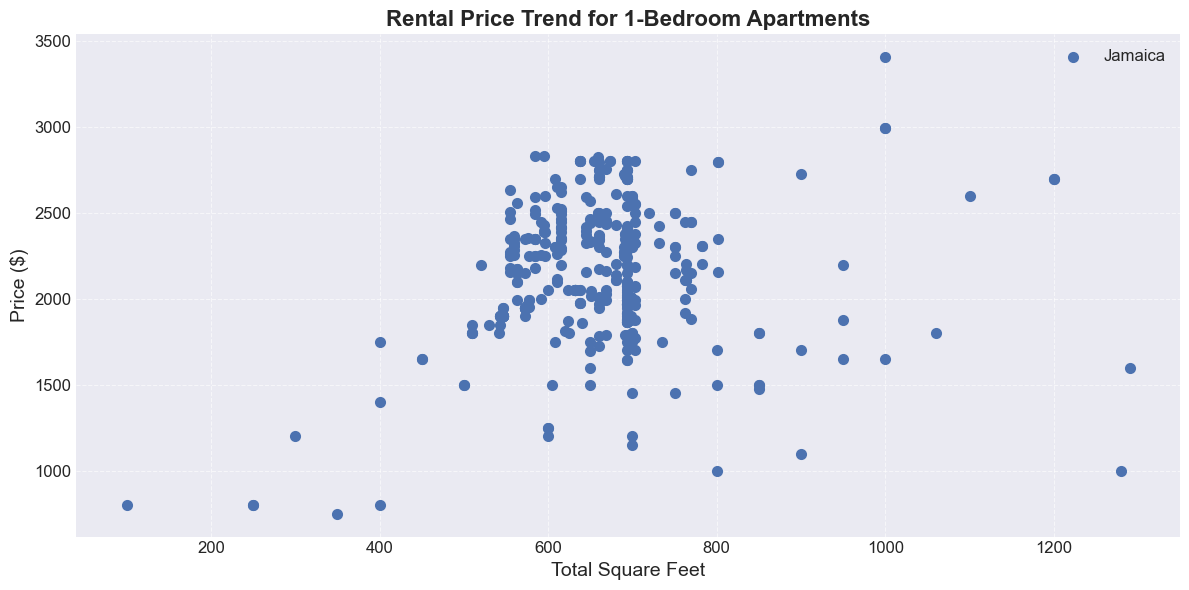

Mean Squared Error: 131501.76
R-squared: -0.12


In [89]:
# Rental Price trend for one bedroom apartments in Jamaica and NYC
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
filteredx = jamaicaOneBrnonan["Total Square Feet"][jamaicaOneBrnonan["Total Square Feet"] < 1500]
filteredy = jamaicaOneBrnonan["Price"][jamaicaOneBrnonan["Total Square Feet"] < 1500]
ax.scatter(filteredx, filteredy, label='Jamaica', color='#4C72B0', linewidth=2)
ax.set_title("Rental Price Trend for 1-Bedroom Apartments", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Regression Analysis
X = jamaicaOneBrnonan[["Total Square Feet"]][jamaicaOneBrnonan["Total Square Feet"] < 1500]
y = jamaicaOneBrnonan["Price"][jamaicaOneBrnonan["Total Square Feet"] < 1500]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


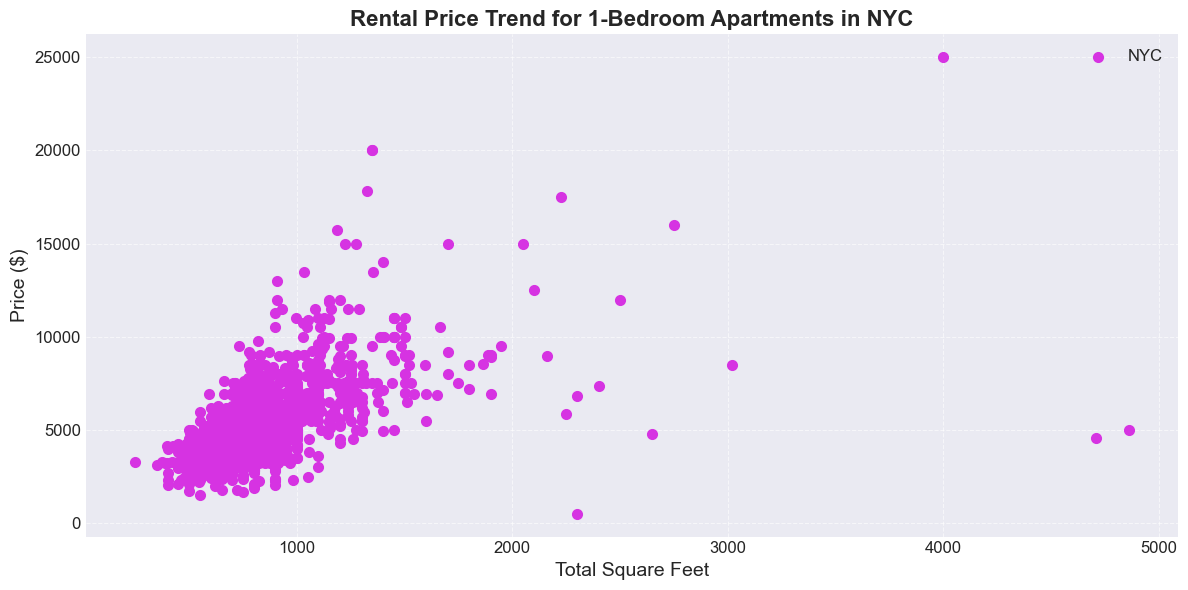

NYC Mean Squared Error: 1985346.84
NYC R-squared: 0.45
Logistic Regression Accuracy: 0.06
Elastic Net Mean Squared Error: 2446425.54
Elastic Net R-squared: 0.42
Logistic Regression Accuracy: 0.06
Elastic Net Mean Squared Error: 2446425.54
Elastic Net R-squared: 0.42


/Users/owenhuang/.pyenv/versions/MLDLNEW/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [67]:
# Rental Price Trend for one bedroom apartments in NYC
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
filteredx = nycdfOneB["Total Square Feet"][nycdfOneB["Total Square Feet"] < 5000]
filteredy = nycdfOneB["Price"][nycdfOneB["Total Square Feet"] < 5000]
ax.scatter(filteredx, filteredy, label='NYC', color='#D633E2', linewidth=2)
ax.set_title("Rental Price Trend for 1-Bedroom Apartments in NYC", fontsize=16, fontweight='bold')
ax.set_xlabel("Total Square Feet", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Regression Analysis for NYC
nycdfOneBnonan = nycdfOneB.dropna(subset=["Total Square Feet", "Price"])
X_nyc = nycdfOneBnonan[["Total Square Feet"]][nycdfOneBnonan["Total Square Feet"] < 2000]
y_nyc = nycdfOneBnonan["Price"][nycdfOneBnonan["Total Square Feet"] < 2000]
X_train_nyc, X_test_nyc, y_train_nyc, y_test_nyc = train_test_split(X_nyc, y_nyc, test_size=0.2)
model_nyc = LinearRegression()
model_nyc.fit(X_train_nyc, y_train_nyc)
y_pred_nyc = model_nyc.predict(X_test_nyc)
# Model Evaluation for NYC
mse_nyc = mean_squared_error(y_test_nyc, y_pred_nyc)
r2_nyc = r2_score(y_test_nyc, y_pred_nyc)
print(f"NYC Mean Squared Error: {mse_nyc:.2f}")
print(f"NYC R-squared: {r2_nyc:.2f}")

# Regression using logistic regression
from sklearn.linear_model import LogisticRegression
X_train_nyc, X_test_nyc, y_train_nyc, y_test_nyc = train_test_split(X_nyc, y_nyc, test_size=0.2)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_nyc, y_train_nyc)
y_pred_logistic = logistic_model.predict(X_test_nyc)
# Model Evaluation for Logistic Regression
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test_nyc, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Regression using elastic net
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train_nyc, y_train_nyc)
y_pred_elastic = elastic_model.predict(X_test_nyc)
# Model Evaluation for Elastic Net
mse_elastic = mean_squared_error(y_test_nyc, y_pred_elastic)
r2_elastic = r2_score(y_test_nyc, y_pred_elastic)
print(f"Elastic Net Mean Squared Error: {mse_elastic:.2f}")
print(f"Elastic Net R-squared: {r2_elastic:.2f}")

In [90]:
jamaicadf = pd.read_excel("rentalsJamaica.xlsx")

len(jamaicadf["Property Type"].unique())

56

In [91]:
import plotly.express as px

# Optionally, group rare types or abbreviate long names here

fig = px.box(
    jamaicadf[jamaicadf["Beds"] == 1],
    x='Property Type',
    y='Price',
    color='Property Type',
    title='Price Distribution by House Type (Logarithmic Scale)',
    labels={'Property Type': 'House Type', 'Price': 'Price'},
    log_y=True,
    width=1400,  # wider plot
    height=600
)
fig.update_xaxes(tickangle=45, tickfont=dict(size=12))
fig.update_layout(
    margin=dict(l=40, r=40, t=60, b=160),
    xaxis_title='House Type',
    yaxis_title='Price (log scale)',
    showlegend=True
)
fig.show()

In [92]:
import plotly.express as px

# Optionally, group rare types or abbreviate long names here

fig = px.box(
    jamaicadf[jamaicadf["Beds"] == 2],
    x='Property Type',
    y='Price',
    color='Property Type',
    title='Price Distribution by House Type (Logarithmic Scale)',
    labels={'Property Type': 'House Type', 'Price': 'Price'},
    log_y=True,
    width=1400,  # wider plot
    height=600
)
fig.update_xaxes(tickangle=45, tickfont=dict(size=12))
fig.update_layout(
    margin=dict(l=40, r=40, t=60, b=160),
    xaxis_title='House Type',
    yaxis_title='Price (log scale)',
    showlegend=True
)
fig.show()

In [93]:
import plotly.express as px

# Optionally, group rare types or abbreviate long names here

fig = px.box(
    jamaicadf[jamaicadf["Beds"] == 3],
    x='Property Type',
    y='Price',
    color='Property Type',
    title='Price Distribution by House Type (Logarithmic Scale)',
    labels={'Property Type': 'House Type', 'Price': 'Price'},
    log_y=True,
    width=1400,  # wider plot
    height=600
)
fig.update_xaxes(tickangle=45, tickfont=dict(size=12))
fig.update_layout(
    margin=dict(l=40, r=40, t=60, b=160),
    xaxis_title='House Type',
    yaxis_title='Price (log scale)',
    showlegend=True
)
fig.show()

In [94]:
# Avegrage Price by Property Type
avg_price_by_type = jamaicadf.groupby('Property Type')['Price'].mean().sort_values(ascending=False)
print("Average Price by Property Type:")
print(avg_price_by_type)    
# Bar Chart
fig = px.bar(
    avg_price_by_type,
    x=avg_price_by_type.index,
    y=avg_price_by_type.values,
    title='Average Price by Property Type',
    labels={'x': 'Property Type', 'y': 'Average Price'},
    color=avg_price_by_type.values,
    color_continuous_scale='Viridis'
)

Average Price by Property Type:
Property Type
Rental/Single Family/Townhouse                        226224.500000
Other                                                   4321.428571
Townhouse                                               3307.714286
Townhouse/Rental/Multi Family/Apartment                 3300.000000
Co-op/Apartment/Single Family                           3150.000000
Co-op/Multi Family/Apartment                            3025.000000
Rental/Co-op/Other                                      3000.000000
Townhouse/Multi Family/Apartment                        3000.000000
Other/Co-op                                             3000.000000
Townhouse/Single Family                                 2916.666667
Multi Family                                            2838.612245
Condo                                                   2772.019608
Rental/Duplex                                           2700.000000
Apartment                                               2657.744709
Si

In [111]:
import plotly.express as px

# Optionally, group rare types or abbreviate long names here

fig = px.box(
    jamaicadf[jamaicadf["Beds"] == 4],
    x='Property Type',
    y='Price',
    color='Property Type',
    title='Jamaica 4 Bedrooms Price Distribution by House Type (Logarithmic Scale)',
    labels={'Property Type': 'House Type', 'Price': 'Price'},
    log_y=True,
    width=1400,  # wider plot
    height=600
)
fig.update_xaxes(tickangle=45, tickfont=dict(size=12))
fig.update_layout(
    margin=dict(l=40, r=40, t=60, b=160),
    xaxis_title='House Type',
    yaxis_title='Price (log scale)',
    showlegend=True
)
fig.show()


Average Price by Address:
Address
168-01 168th Street              18000.0
181-22 Hillside Avenue           13000.0
166-20 90th Avenue, Unit 711      3575.0
166-20 90th Avenue, Unit 1711     3560.0
166-20 90th Avenue, Unit 611      3550.0
                                  ...   
109-56 Guy R Brewer Boulevard      600.0
110-36 167th Street                600.0
105-17 169th Street, Unit 1        600.0
173-17 89th Ave, Unit 1G             NaN
173-17 89th Ave, Unit LH             NaN
Name: Price, Length: 1189, dtype: float64


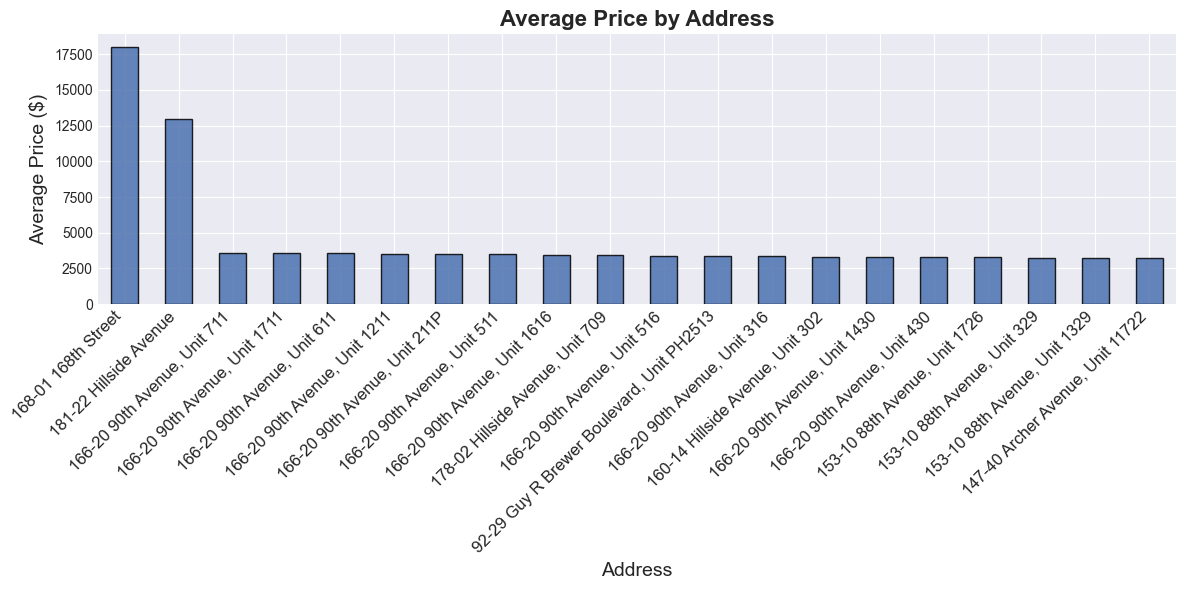


Average Price by Address:
Address
111-28 144th Street, Unit 2      950000.0
168-01 168th Street               18000.0
181-22 Hillside Avenue            13000.0
166-20 90th Avenue, Unit 711       3575.0
166-20 90th Avenue, Unit 1711      3560.0
                                   ...   
109-56 Guy R Brewer Boulevard       600.0
110-36 167th Street                 600.0
105-17 169th Street, Unit 1         600.0
173-17 89th Ave, Unit 1G              NaN
173-17 89th Ave, Unit LH              NaN
Name: Price, Length: 1190, dtype: float64


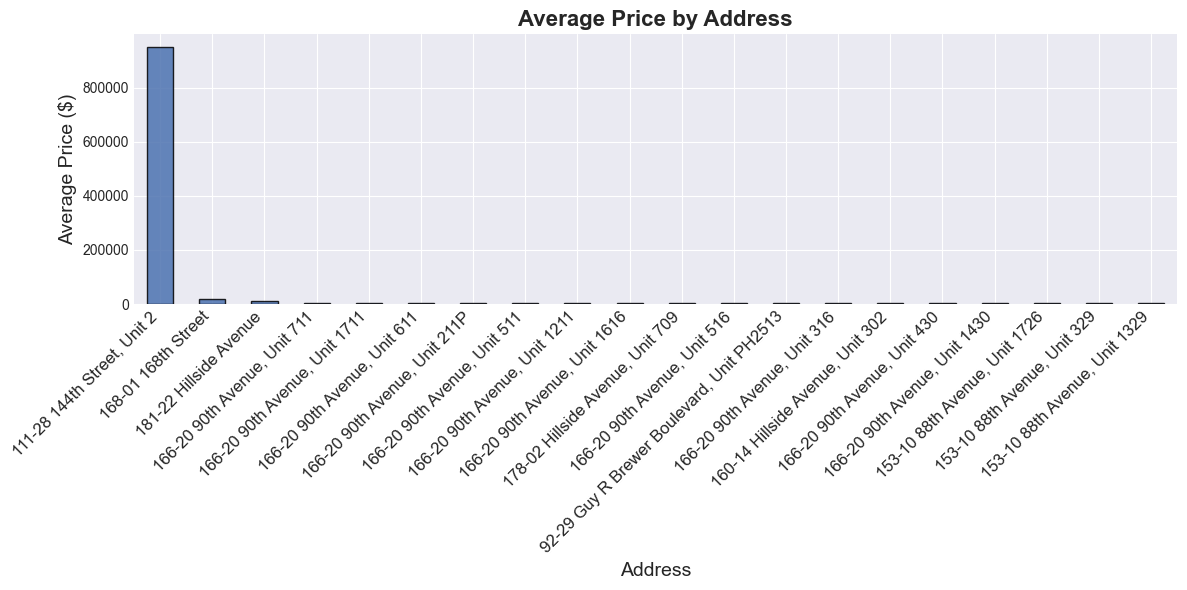

In [96]:
# Average Price by Address
jamaicadf_nohighest = jamaicadf[jamaicadf["Address"] != "111-28 144th Street, Unit 2"]
avg_price_by_street = jamaicadf_nohighest[jamaicadf_nohighest["Beds"] == 1].groupby('Address')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Address:")
print(avg_price_by_street)  
# Bar Chart
plt.figure(figsize=(12, 6))
avg_price_by_street.head(20).plot(kind='bar', color='#4C72B0', edgecolor='black', alpha=0.85)
plt.title("Average Price by Address", fontsize=16, fontweight='bold')
plt.xlabel("Address", fontsize=14)
plt.ylabel("Average Price ($)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

avg_price_by_street = jamaicadf[jamaicadf["Beds"] == 1].groupby('Address')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Address:")
print(avg_price_by_street)  
# Bar Chart
plt.figure(figsize=(12, 6))
avg_price_by_street.head(20).plot(kind='bar', color='#4C72B0', edgecolor='black', alpha=0.85)
plt.title("Average Price by Address", fontsize=16, fontweight='bold')
plt.xlabel("Address", fontsize=14)
plt.ylabel("Average Price ($)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


Average Price by Address:
Address
109-52 143rd Street, Unit 2         17000.0
111-44 155th Street                  9850.0
166-20 90th Avenue, Unit 21013       4200.0
160-14 Hillside Avenue, Unit 506     4200.0
153-10 88th Avenue, Unit 106         4075.0
                                     ...   
153-11 109th Road                    1150.0
92-06 173rd Street                   1100.0
177-33 105th Avenue                  1075.0
166-25 89th Avenue                   1000.0
162-25 112th Road, Unit 2BR           933.0
Name: Price, Length: 1026, dtype: float64


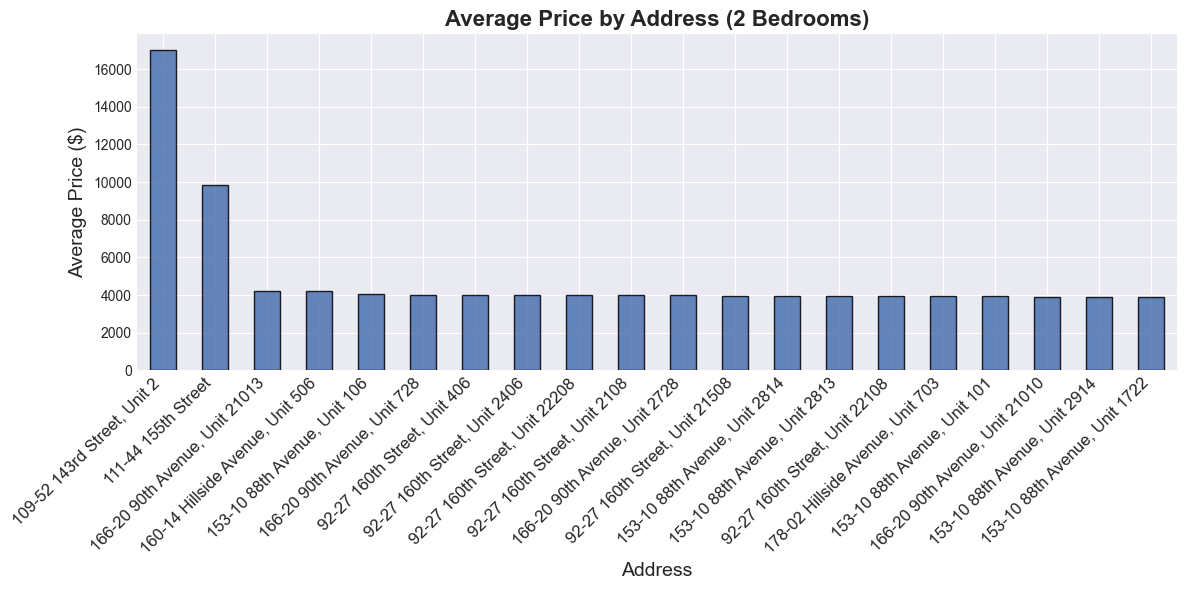

In [110]:
# Average Price by Address
avg_price_by_street = jamaicadf[jamaicadf["Beds"] == 2].groupby('Address')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Address:")
print(avg_price_by_street)  
# Bar Chart
plt.figure(figsize=(12, 6))
avg_price_by_street.head(20).plot(kind='bar', color='#4C72B0', edgecolor='black', alpha=0.85)
plt.title("Average Price by Address (2 Bedrooms)", fontsize=16, fontweight='bold')
plt.xlabel("Address", fontsize=14)
plt.ylabel("Average Price ($)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


Average Price by Address:
Address
109-02 177th St, Unit 1                  449999.000000
152-11 89th Avenue, Unit 627               4950.000000
152-11 89th Avenue, Unit 217               4516.666667
147-40 Archer Avenue, Unit 31916           4501.000000
147-40 Archer Avenue, Unit 31816           4501.000000
                                             ...      
106-33 150th Street, Unit 2                1385.000000
106-15 Guy R Brewer Boulevard, Unit 2      1375.000000
171-08 107th Avenue, Unit 2                1375.000000
147-21 Glassboro Avenue, Unit 1            1300.000000
107-31 171st Street                         850.000000
Name: Price, Length: 911, dtype: float64


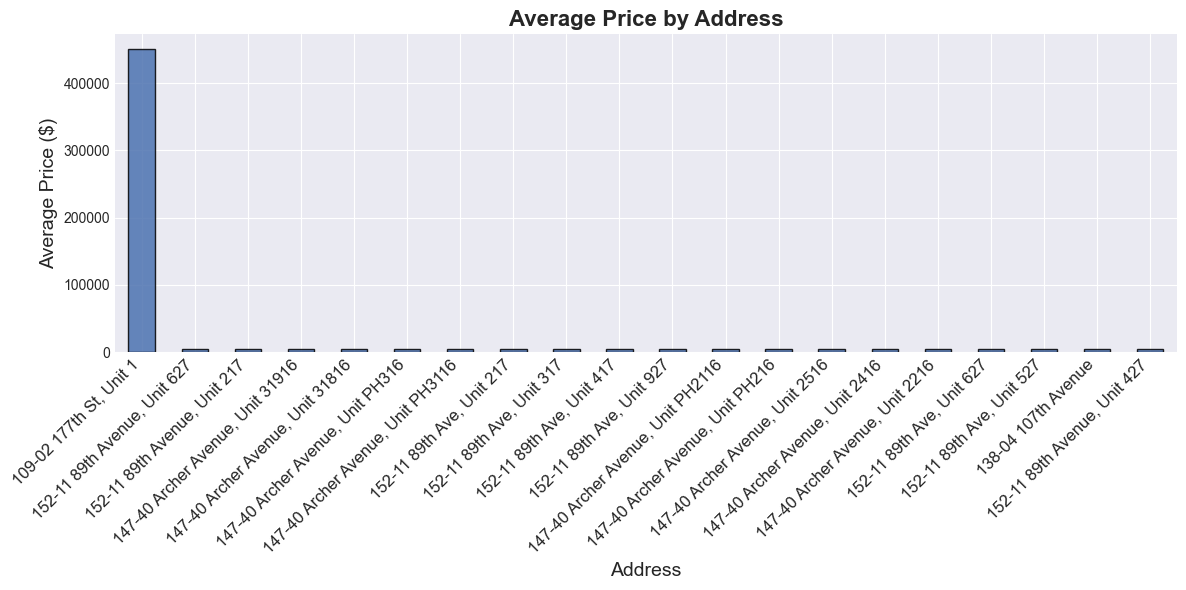


Average Price by Address:
Address
110-41 172nd St                    5000.000000
144-17 Jamaica Avenue              4900.000000
111-18 158th Street                4650.000000
144-17 Jamaica Avenue, Unit 2      4233.333333
107-34 164th Place, Unit 2         4200.000000
                                      ...     
145-66 Lakewood Avenue             1700.000000
146-29 Tuskegee Airmen Way         1700.000000
90-38 Parsons Boulevard            1700.000000
90-38 Parsons Boulevard, Unit 3    1650.000000
146-55 106th Avenue                1550.000000
Name: Price, Length: 155, dtype: float64


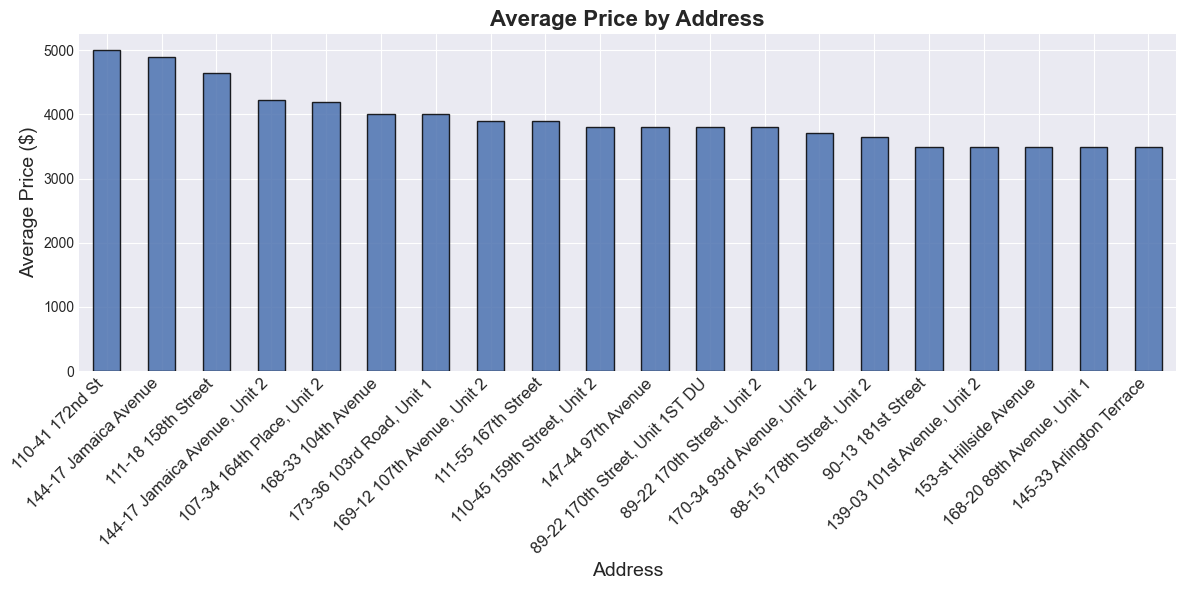

In [98]:
# Average Price by Address
avg_price_by_street = jamaicadf[jamaicadf["Beds"] == 3].groupby('Address')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Address:")
print(avg_price_by_street)  
# Bar Chart
plt.figure(figsize=(12, 6))
avg_price_by_street.head(20).plot(kind='bar', color='#4C72B0', edgecolor='black', alpha=0.85)
plt.title("Average Price by Address", fontsize=16, fontweight='bold')
plt.xlabel("Address", fontsize=14)
plt.ylabel("Average Price ($)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Average Price by Address - Removed the highest
jamaicadf_new = jamaicadf[jamaicadf["Address"] != "109-02 177th St, Unit 1"]
avg_price_by_street = jamaicadf_new[jamaicadf_new["Beds"] == 4].groupby('Address')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Address:")
print(avg_price_by_street)
# Bar Chart
plt.figure(figsize=(12, 6))
avg_price_by_street.head(20).plot(kind='bar', color='#4C72B0', edgecolor='black', alpha=0.85)
plt.title("Average Price by Address", fontsize=16, fontweight='bold')
plt.xlabel("Address", fontsize=14)
plt.ylabel("Average Price ($)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


Average Price by Address:
Address
110-41 172nd St                    5000.000000
144-17 Jamaica Avenue              4900.000000
111-18 158th Street                4650.000000
144-17 Jamaica Avenue, Unit 2      4233.333333
107-34 164th Place, Unit 2         4200.000000
                                      ...     
145-66 Lakewood Avenue             1700.000000
146-29 Tuskegee Airmen Way         1700.000000
90-38 Parsons Boulevard            1700.000000
90-38 Parsons Boulevard, Unit 3    1650.000000
146-55 106th Avenue                1550.000000
Name: Price, Length: 155, dtype: float64


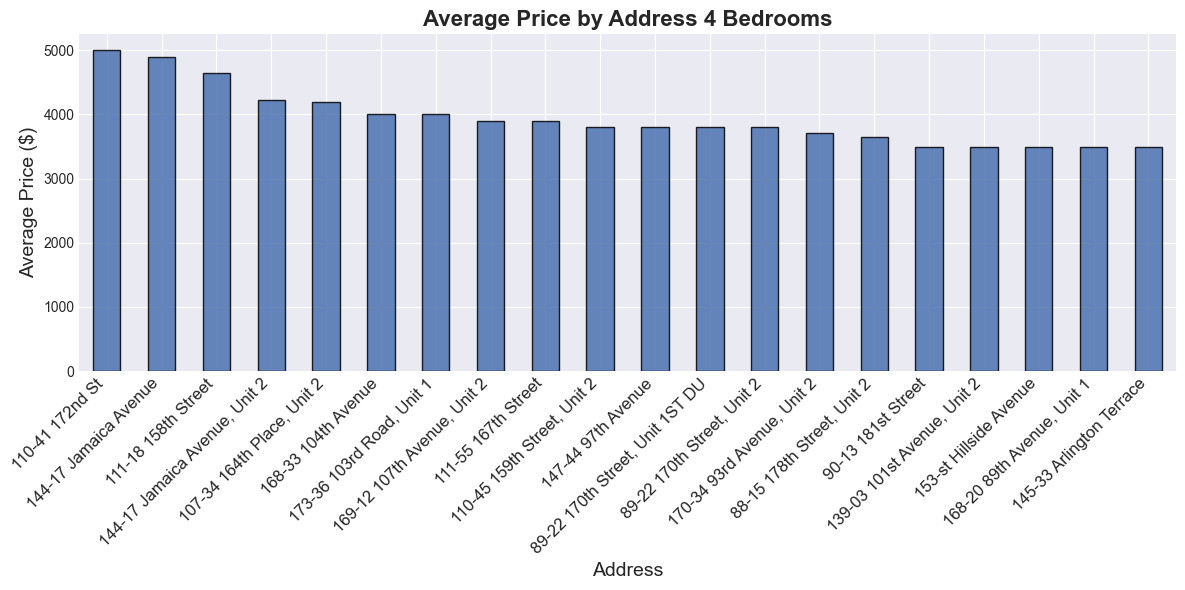

In [109]:
# Average Price by Address
avg_price_by_street = jamaicadf[jamaicadf["Beds"] == 4].groupby('Address')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Address:")
print(avg_price_by_street)  
# Bar Chart
plt.figure(figsize=(12, 6))
avg_price_by_street.head(20).plot(kind='bar', color='#4C72B0', edgecolor='black', alpha=0.85)
plt.title("Average Price by Address 4 Bedrooms", fontsize=16, fontweight='bold')
plt.xlabel("Address", fontsize=14)
plt.ylabel("Average Price ($)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [100]:
jamaicadftwoB = jamaicadf[jamaicadf["Beds"] == 2]
jamaicadftwoB["Total Square Feet"].describe()


count     353.000000
mean     1019.966006
std       405.110323
min       500.000000
25%       850.000000
50%       933.000000
75%      1040.000000
max      4000.000000
Name: Total Square Feet, dtype: float64

In [101]:
jamaicadftwoB["Price"].describe()


count     1334.000000
mean      2517.306597
std        966.159754
min        933.000000
25%       1850.000000
50%       2402.500000
75%       3172.500000
max      18000.000000
Name: Price, dtype: float64

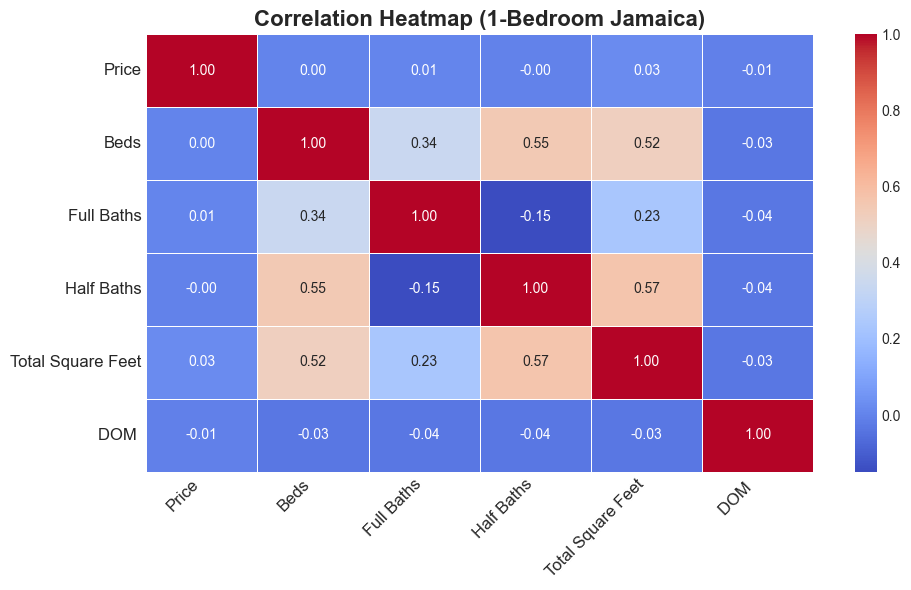

In [102]:
# Correlation heatmap for 1 bedroom apartments in Jamaica
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
jamaicadf["Beds"] = pd.to_numeric(jamaicadf["Beds"], errors="coerce")
numeric_cols = jamaicadf.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax, linewidths=0.5)
ax.set_title('Correlation Heatmap (1-Bedroom Jamaica)', fontsize=16, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [103]:
nycdf = pd.read_excel("rentalsNYC.xlsx")
nycdfTwoB = nycdf[nycdf["Beds"] == 2]
nycdfTwoB["Total Square Feet"].describe()


count     1858.000000
mean      1386.892896
std        794.644865
min        325.000000
25%       1038.000000
50%       1286.000000
75%       1588.750000
max      25144.000000
Name: Total Square Feet, dtype: float64

In [104]:
nycdfTwoB["Price"].describe()


count     1858.000000
mean      9067.284177
std       4637.172368
min       2300.000000
25%       5995.000000
50%       8000.000000
75%      11000.000000
max      38000.000000
Name: Price, dtype: float64

In [105]:
jamaicadf_no_outliers = jamaicadf.sort_values('Price').iloc[:-2]

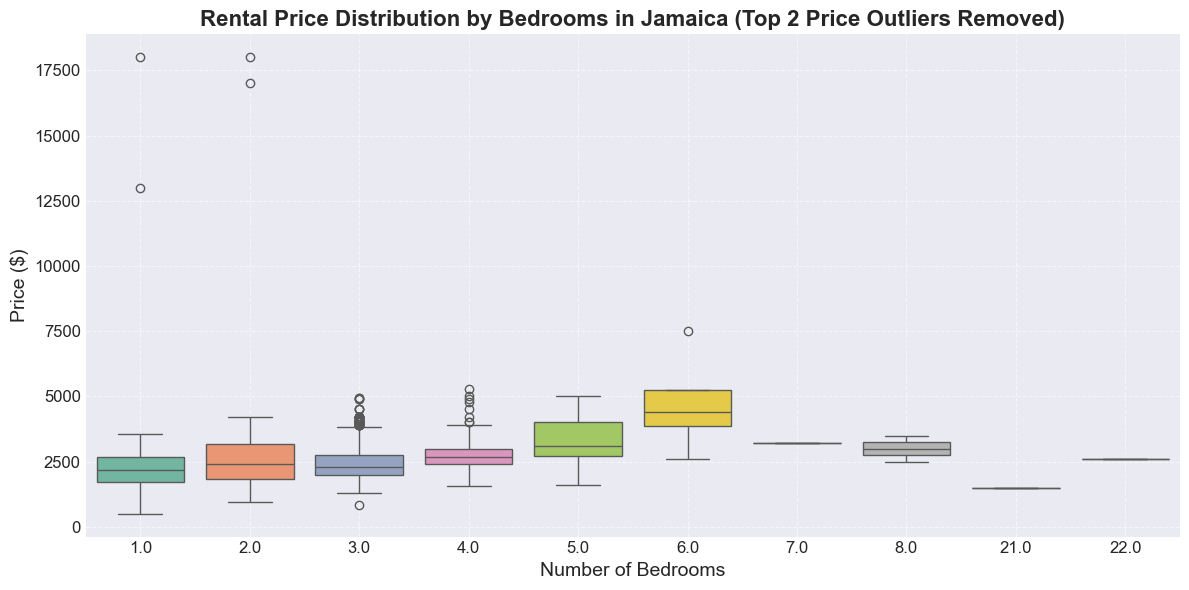

In [106]:
# Rental Price Distribution by Bedrooms in Jamaica (Top 2 Price Outliers Removed)
# clean & convert
jamaicadf['Price'] = pd.to_numeric(
    jamaicadf['Price'].replace('[\$]', '', regex=True),
    errors='coerce'
)

# drop the two largest prices by value
top2_idx = jamaicadf['Price'].nlargest(2).index
jamaicadf_no_outliers = jamaicadf.drop(top2_idx)


plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Beds', y='Price', data=jamaicadf_no_outliers, hue='Beds', palette='Set2', ax=ax, legend=False)
ax.set_title("Rental Price Distribution by Bedrooms in Jamaica (Top 2 Price Outliers Removed)", fontsize=16, fontweight='bold')
ax.set_xlabel("Number of Bedrooms", fontsize=14)
ax.set_ylabel("Price ($)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [46]:
nycdf = pd.read_excel("rentalsNYC.xlsx")

         count      min      max   median
Beds                                     
1         1722    500.0   9250.0   4750.0
2         1778   2300.0  18500.0   7995.0
3          897   2500.0  33000.0  12995.0
4          285   3950.0  48000.0  18500.0
5           66   6450.0  55000.0  22000.0
6           11  16000.0  80000.0  27500.0
7            3  11000.0  12500.0  12000.0
8            4  60000.0  75000.0  67500.0
Alcove      82   1995.0   5500.0   3499.5
Studio     202   1500.0   5750.0   3262.5
Unknown      6    100.0  17440.0   3050.0


/var/folders/gj/84cwp0nn3tv2_r__6jbrp5hc0000gn/T/ipykernel_27774/294197722.py:25: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/gj/84cwp0nn3tv2_r__6jbrp5hc0000gn/T/ipykernel_27774/294197722.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




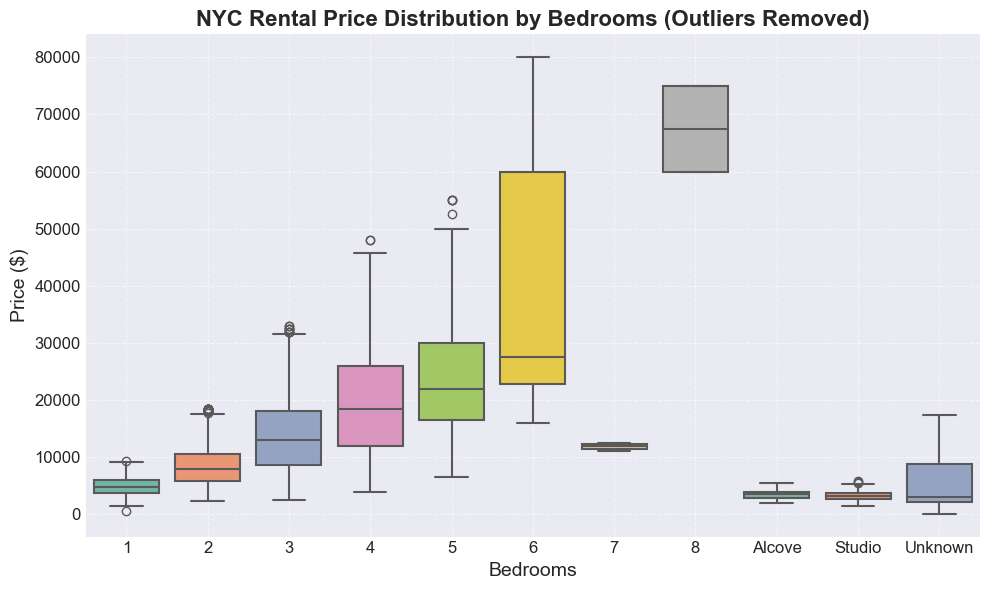

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Start with a cleaned copy

# Drop rows with missing price
nycdf = nycdf.loc[nycdf['Price'].notna()].copy()

# Normalize Beds to string, fill NaN so grouping doesn't drop them silently if desired
nycdf['Beds'] = nycdf['Beds'].fillna('Unknown').astype(str)

def remove_outliers_iqr(df, group_col, value_col, hard_cap=100000):
    def iqr_filter(group):
        if len(group) < 4:  # too few points to define IQR reliably
            return group
        Q1 = group[value_col].quantile(0.25)
        Q3 = group[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return group[(group[value_col] >= lower) & (group[value_col] <= upper)]
    filtered = (
        df.groupby(group_col, group_keys=False)
          .apply(iqr_filter)
          .reset_index(drop=True)
    )
    # Hard cap to remove any remaining extreme values
    filtered = filtered[filtered[value_col] < hard_cap].copy()
    return filtered

nyc_no_outliers = remove_outliers_iqr(nycdf, 'Beds', 'Price')

# Diagnostic: counts per bed category after filtering
print(nyc_no_outliers.groupby('Beds')['Price'].agg(['count', 'min', 'max', 'median']))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    data=nyc_no_outliers,
    x='Beds',
    y='Price',
    palette='Set2',
    ax=ax,
    linewidth=1.5
)
ax.set_title('NYC Rental Price Distribution by Bedrooms (Outliers Removed)', fontsize=16, fontweight='bold')
ax.set_xlabel('Bedrooms', fontsize=14)
ax.set_ylabel('Price ($)', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


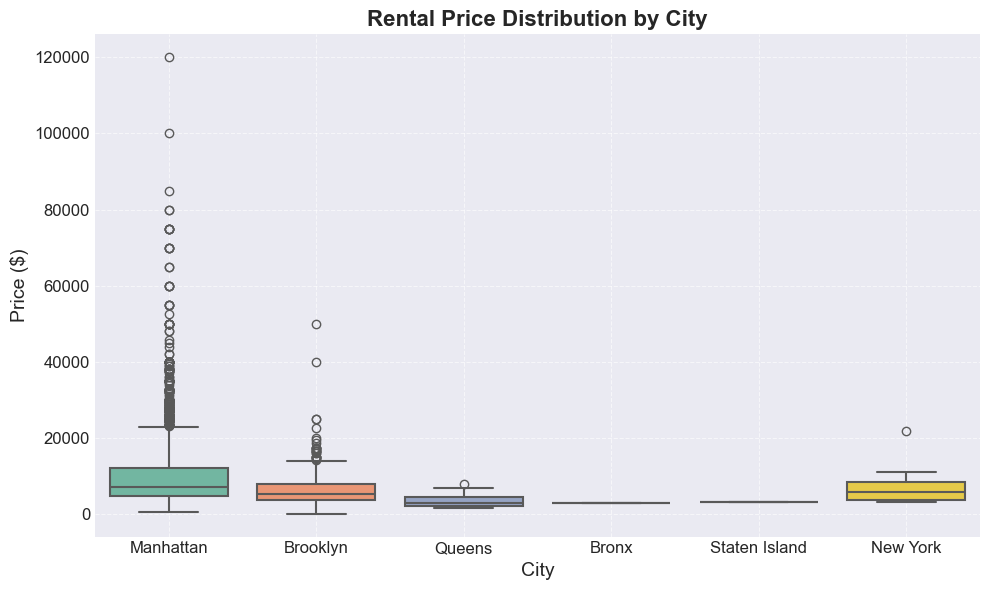

In [48]:
# Rental Price Distribution by City
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))
if 'City' in jamaicadf.columns:
    sns.boxplot(data=nycdf, x='City', y='Price', hue='City', palette='Set2', ax=ax, linewidth=1.5, legend=False)
    ax.set_title('Rental Price Distribution by City', fontsize=16, fontweight='bold')
    ax.set_xlabel('City', fontsize=14)
    ax.set_ylabel('Price ($)', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'City' not found in jamaicadf. Available columns:")
    print(jamaicadf.columns.tolist())

In [49]:
# Multiple Regression to Determine Price Influencers
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Standardize column names to avoid KeyError
jamaicadf.columns = jamaicadf.columns.str.strip()

# Check available columns
print(jamaicadf.columns)

# Use the correct column names
X = jamaicadf[["Beds", "Full Baths", "Half Baths", "Total Square Feet"]].dropna()
y = jamaicadf.loc[X.index, "Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = [
    ("Linear Regression", LinearRegression()),
    ("Elastic Net", ElasticNet(alpha=0.1, l1_ratio=0.5)),
    ("Ridge", Ridge(alpha=1.0)),
    ("Lasso", Lasso(alpha=0.1)),
    ("Random Forest", RandomForestRegressor(n_estimators=100))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}\n")

# None of the models are good.

Index(['Address', 'Status', 'Listing Type', 'Building', 'Neighborhood', 'City',
       'Price', 'Beds', 'Full Baths', 'Half Baths', 'Total Square Feet', 'DOM',
       'Move in Date', 'Updated Date', 'List Date', 'Rented Date',
       'Property Type'],
      dtype='object')
Linear Regression:
  Mean Squared Error: 68989956.44
  R-squared: -212.93

Elastic Net:
  Mean Squared Error: 23102916.16
  R-squared: -70.64

Ridge:
  Mean Squared Error: 60484786.43
  R-squared: -186.56

Lasso:
  Mean Squared Error: 68975052.26
  R-squared: -212.88

Random Forest:
  Mean Squared Error: 1691570.99
  R-squared: -4.25

